In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data/usa/final_presidential_speeches.csv")

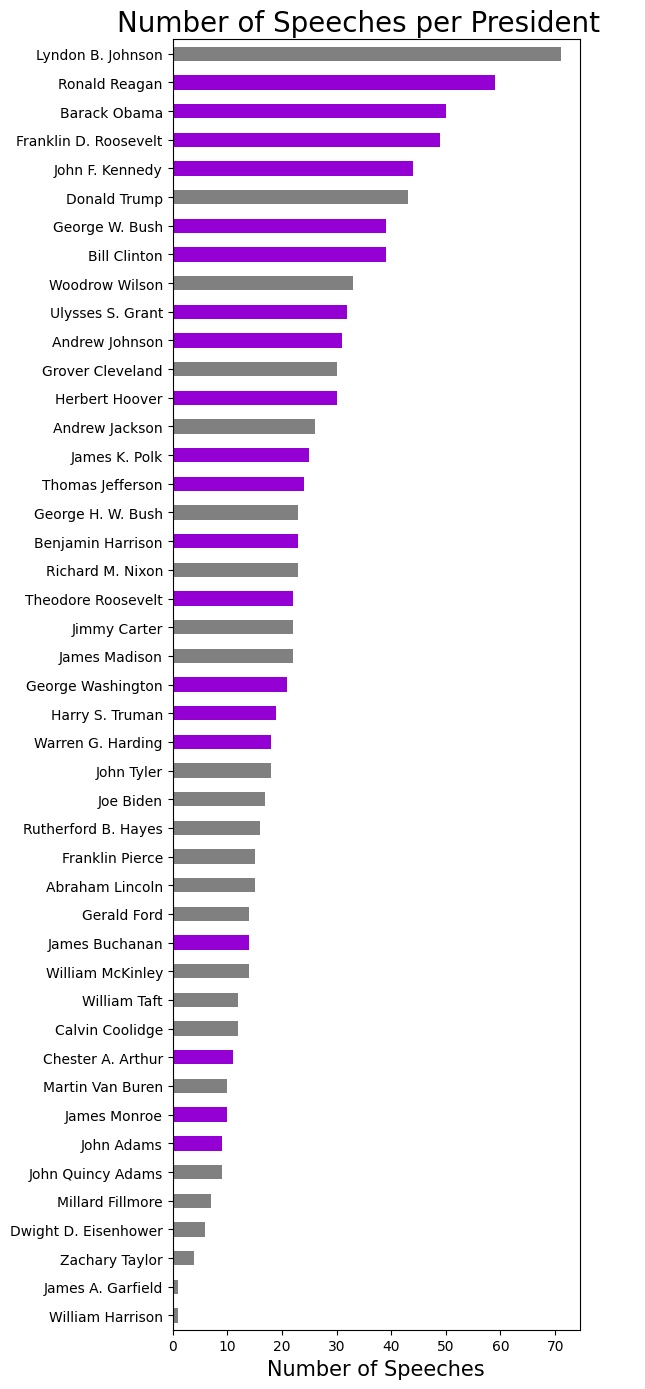

In [8]:
plt.figure(figsize=(6, 14))
my_colors = ['gray','gray','gray','gray','gray','gray', 'darkviolet', 'darkviolet', 'gray', 'darkviolet','gray', 'gray',
            'gray', 'darkviolet', 'gray','gray', 'gray','gray', 'gray', 'gray', 'darkviolet', 'darkviolet', 'darkviolet',
             'gray','gray', 'darkviolet', 'gray','darkviolet', 'gray','darkviolet','darkviolet', 'gray', 'darkviolet',
             'gray', 'darkviolet','darkviolet','gray','darkviolet','darkviolet', 'gray', 'darkviolet','darkviolet','darkviolet','darkviolet']

df.President.value_counts(ascending=True).plot(kind = 'barh', color=my_colors)
plt.xlabel('Number of Speeches', fontsize = 15)
plt.title('Number of Speeches per President    ', fontsize = 20)
plt.tight_layout()
plt.savefig('usa_dump/No._Pres_Speeches.png');

In [22]:
import re
import string
from nltk.stem import LancasterStemmer
from nltk.probability import FreqDist

from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import seaborn as sns
%matplotlib inline

In [13]:
df["Year"] = df["Date"].apply(lambda x: int(x.split("-")[0]))

In [18]:
# to string Transcript column
df["Transcript"] = df["Transcript"].astype(str)

In [19]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
no_n = lambda x: re.sub('\n', '', x)
no_r = lambda x: re.sub('\r', '', x)
no_hyphen = lambda x: re.sub('-', ' ', x)
df['Transcript'] = df.Transcript.map(alphanumeric).map(punc_lower).map(no_n).map(no_r).map(no_hyphen)
df['Split'] = df.Transcript.str.split()

In [23]:
fr = FreqDist(df.Split[0])

for s in df.Split[1:]:
    frdist = FreqDist(s)
    fr.update(frdist)

def getKey(item):
    return item[1]
a = fr.items()

In [25]:
stop_words2 = ['united', 'state', 'states', 'president', 'don', 'thank', 'mr', 'america', 're',
               've', 'applause', 'transcript', 'anscript', 'country']
stop_words1 = set(stopwords.words('english'))
final_stops = list(stop_words1) + stop_words2

In [26]:
X = df.Transcript
y = df.President

In [27]:
cv = CountVectorizer(stop_words=final_stops, max_df=0.4, min_df = 5)

doc_word = cv.fit_transform(X)
X_t_cv  = cv.transform(X)


nmf_model = NMF(10)
doc_topic = nmf_model.fit_transform(doc_word)

topic_word_nmf = pd.DataFrame(nmf_model.components_.round(3), 
             index = ["component_1","component_2", "component_3","component_4", "component_5", 
                     "component_6","component_7", "component_8","component_9", "component_10"
                     ],
             columns = cv.get_feature_names())
topic_word_nmf

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abandoned,abandoning,abandonment,abandons,abate,abated,abatement,abc,abdication,...,yukon,zeal,zealand,zealous,zealously,zero,zimbabwe,zinc,zone,zones
component_1,0.056,0.233,0.000,0.052,0.007,0.025,0.017,0.011,0.000,0.000,...,0.010,0.231,0.034,0.021,0.038,0.001,0.000,0.008,0.026,0.021
component_2,0.096,0.063,0.007,0.022,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.067,0.015,0.000,0.000,0.163
component_3,0.000,0.000,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.102,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000
component_4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.070,0.000,...,0.000,0.000,0.013,0.000,0.000,0.282,0.000,0.035,0.081,0.020
component_5,0.265,0.039,0.061,0.128,0.000,0.000,0.007,0.000,0.000,0.061,...,0.129,0.024,0.062,0.064,0.006,0.000,0.000,0.002,0.860,0.000
component_6,0.000,0.006,0.000,0.000,0.000,0.001,0.002,0.001,0.000,0.000,...,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.014,0.002
component_7,0.257,0.049,0.055,0.012,0.011,0.005,0.003,0.000,0.007,0.013,...,0.000,0.036,0.053,0.000,0.002,0.014,0.011,0.000,0.105,0.049
component_8,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.126,0.000,...,0.000,0.000,0.000,0.000,0.008,0.004,0.000,0.000,0.167,0.044
component_9,0.231,0.246,0.004,0.044,0.000,0.002,0.007,0.000,0.000,0.002,...,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.002,0.073,0.006
component_10,0.059,0.178,0.018,0.098,0.010,0.000,0.000,0.025,0.000,0.002,...,0.005,0.193,0.006,0.076,0.029,0.000,0.000,0.001,0.000,0.000


In [28]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [29]:
display_topics(nmf_model, cv.get_feature_names(), 10)


Topic  0
department, report, per, legislation, fiscal, attention, value, trade, cent, silver

Topic  1
jobs, tax, tonight, health, economy, get, families, plan, budget, percent

Topic  2
slavery, slave, missouri, nebraska, compromise, principle, slaves, north, bill, south

Topic  3
going, get, lot, got, really, look, thing, something, ahead, job

Topic  4
commerce, conditions, labor, department, commission, navy, interstate, court, legislation, army

Topic  5
examination, classified, commission, person, officer, examinations, rule, fitness, appointment, customs

Topic  6
soviet, vietnam, south, nuclear, europe, economic, weapons, international, east, cooperation

Topic  7
governor, carter, tax, percent, ford, reagan, billion, inflation, program, unemployment

Topic  8
mexico, treaty, texas, mexican, territory, army, republic, minister, amount, lands

Topic  9
bank, treasury, executive, duties, banks, revenue, character, thus, condition, amount


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
doc_topic_nmf = pd.DataFrame(doc_topic.round(3),
                             index = df.Year.astype(int), 
                             columns = ["Domestic1","Economy1", "Slavery", "Encouragement", "Domestic2", "Civil_Service",  
                     "Cold_War", "Economic_Crisis","Mid_1800s_Politics", "Economy2"
                     ])
dtn = doc_topic_nmf.groupby(doc_topic_nmf.index).sum()

dtn.reset_index(level = 0, inplace = True)
graph_topics = dtn.groupby(dtn.Year // 10 * 10).sum()
graph_topics.drop(['Year'], axis=1, inplace = True) 
graph_topics.head()

,Domestic1,Economy1,Slavery,Encouragement,Domestic2,Civil_Service,Cold_War,Economic_Crisis,Mid_1800s_Politics,Economy2
Year,,,,,,,,,,
1780,0.000,0.021,0.008,0.000,0.020,0.004,0.056,0.002,0.003,0.352
1790,0.863,0.131,0.297,0.228,0.380,0.434,1.467,0.083,1.690,7.606
1800,1.053,0.432,0.639,0.269,0.466,0.397,1.028,0.085,1.720,7.034
1810,1.767,0.060,0.294,0.018,0.215,0.130,1.159,0.057,3.919,9.489
1820,4.380,0.063,0.266,0.002,0.514,0.454,1.164,0.053,5.382,16.577


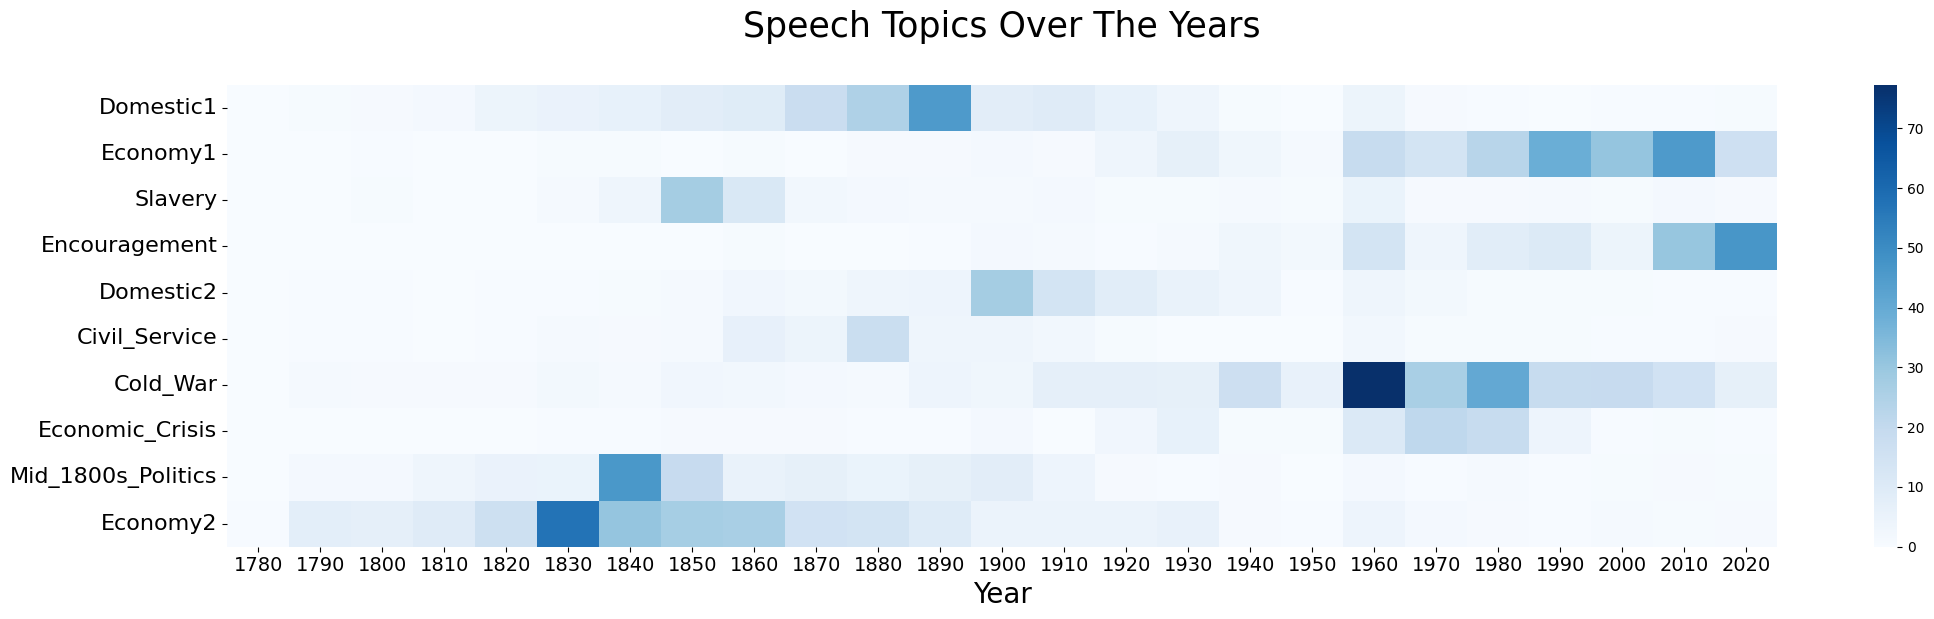

In [31]:
plt.figure(figsize = (25, 6))
sns.heatmap(graph_topics.T, annot=False, cbar=True, cmap="Blues")
plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 16)
plt.title('Speech Topics Over The Years\n', fontsize=25)
plt.savefig('usa_dump/Speech_heatmap.png');

In [34]:
df

,President,Date,Transcript,Year,Split
0,Joe Biden,2022-09-01 00:00:00,the president my fellow americans please if...,2022,"[the, president, my, fellow, americans, please..."
1,Joe Biden,2022-05-24 00:00:00,good evening fellow americans i had hoped w...,2022,"[good, evening, fellow, americans, i, had, hop..."
2,Joe Biden,2022-03-26 00:00:00,the president thank you thank you thank you...,2022,"[the, president, thank, you, thank, you, thank..."
3,Joe Biden,2022-03-01 00:00:00,speaker of the house nancy pelosi members of ...,2022,"[speaker, of, the, house, nancy, pelosi, membe..."
4,Joe Biden,2022-02-24 00:00:00,the president sorry to keep you waiting good...,2022,"[the, president, sorry, to, keep, you, waiting..."
...,...,...,...,...,...
1028,George Washington,1790-12-29,i the president of the united states by my ow...,1790,"[i, the, president, of, the, united, states, b..."
1029,George Washington,1790-12-08,fellow citizens of the senate and house of rep...,1790,"[fellow, citizens, of, the, senate, and, house..."
1030,George Washington,1790-01-08,fellow citizens of the senate and house of rep...,1790,"[fellow, citizens, of, the, senate, and, house..."
1031,George Washington,1789-10-03,whereas it is the duty of all nations to ackno...,1789,"[whereas, it, is, the, duty, of, all, nations,..."


In [33]:
array_Presidents = df.President.unique()
array_Presidents

array(['Joe Biden', 'Donald Trump', 'Barack Obama', 'George W. Bush',
       'Bill Clinton', 'George H. W. Bush', 'Ronald Reagan',
       'Chester A. Arthur', 'Jimmy Carter', 'Gerald Ford',
       'Richard M. Nixon', 'Lyndon B. Johnson', 'John F. Kennedy',
       'Dwight D. Eisenhower', 'Harry S. Truman', 'Franklin D. Roosevelt',
       'Herbert Hoover', 'Calvin Coolidge', 'Warren G. Harding',
       'Woodrow Wilson', 'William Taft', 'Theodore Roosevelt',
       'William McKinley', 'Grover Cleveland', 'Benjamin Harrison',
       'James A. Garfield', 'Rutherford B. Hayes', 'Ulysses S. Grant',
       'Andrew Johnson', 'Abraham Lincoln', 'James Buchanan',
       'Franklin Pierce', 'Millard Fillmore', 'Zachary Taylor',
       'James K. Polk', 'John Tyler', 'William Harrison',
       'John Quincy Adams', 'Martin Van Buren', 'Andrew Jackson',
       'James Monroe', 'James Madison', 'Thomas Jefferson', 'John Adams',
       'George Washington'], dtype=object)

In [32]:
from wordcloud import WordCloud

In [37]:
def wordCloud(president):
    comment_words = '' 
    stopwords = set(final_stops) 
    
    pres_df = df[df.President == president]
    section = pres_df.Transcript
    
    for val in section: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        comment_words += " ".join(tokens)+" "

    word_cloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(word_cloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)
    plt.title(president, fontsize = 20)
    plt.savefig('usa_dump/wordcloud_'+president+'.png');

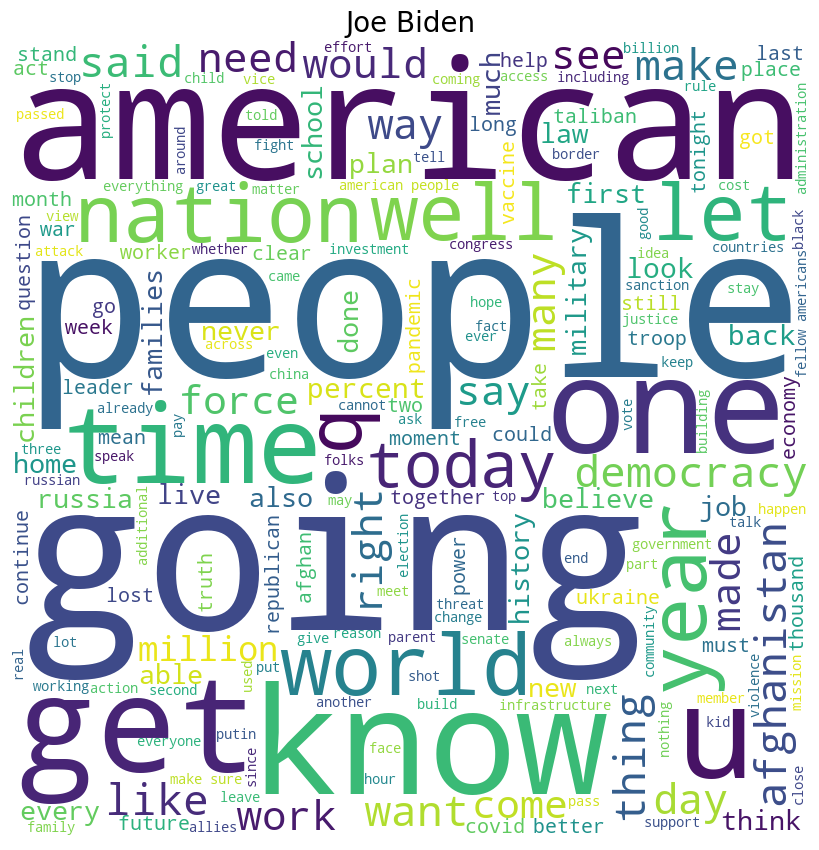

In [38]:
wordCloud("Joe Biden")

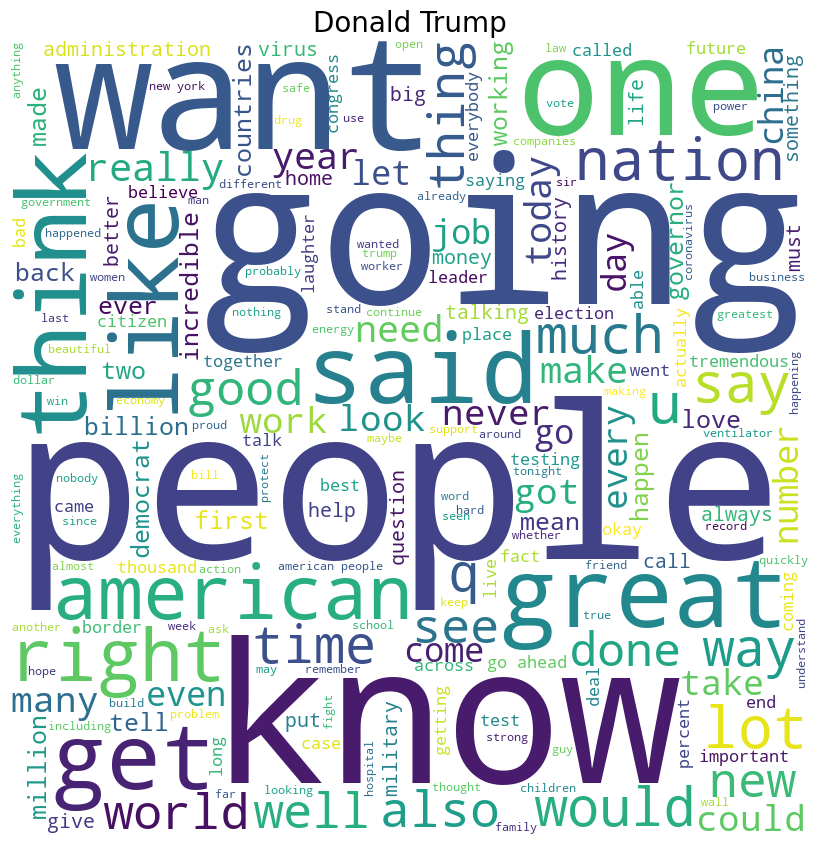

In [39]:
wordCloud("Donald Trump")

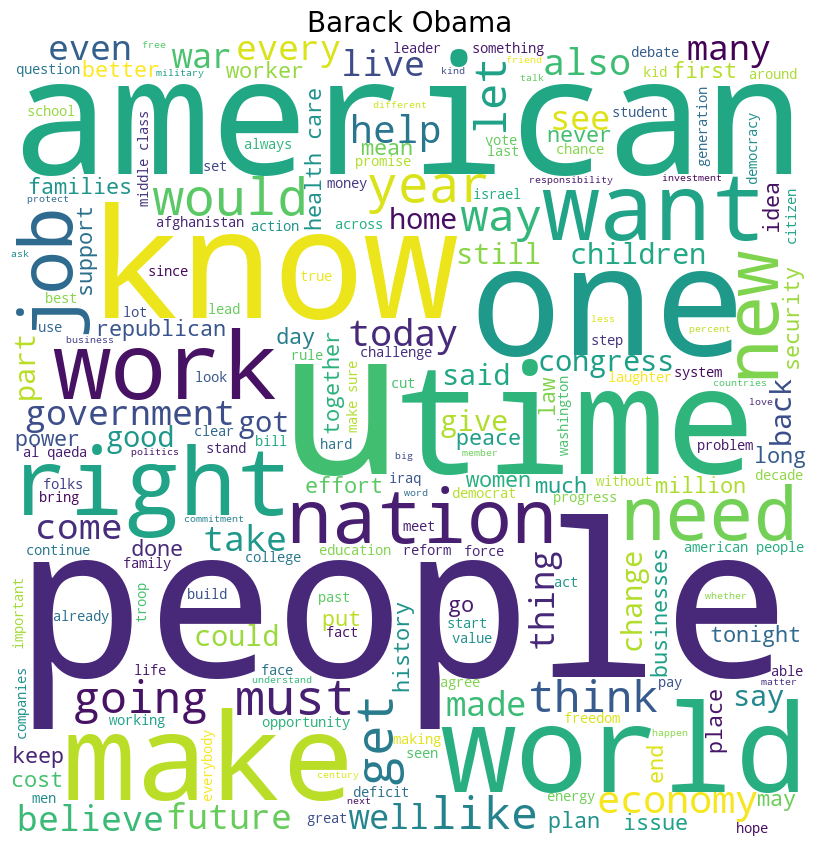

In [40]:
wordCloud("Barack Obama")

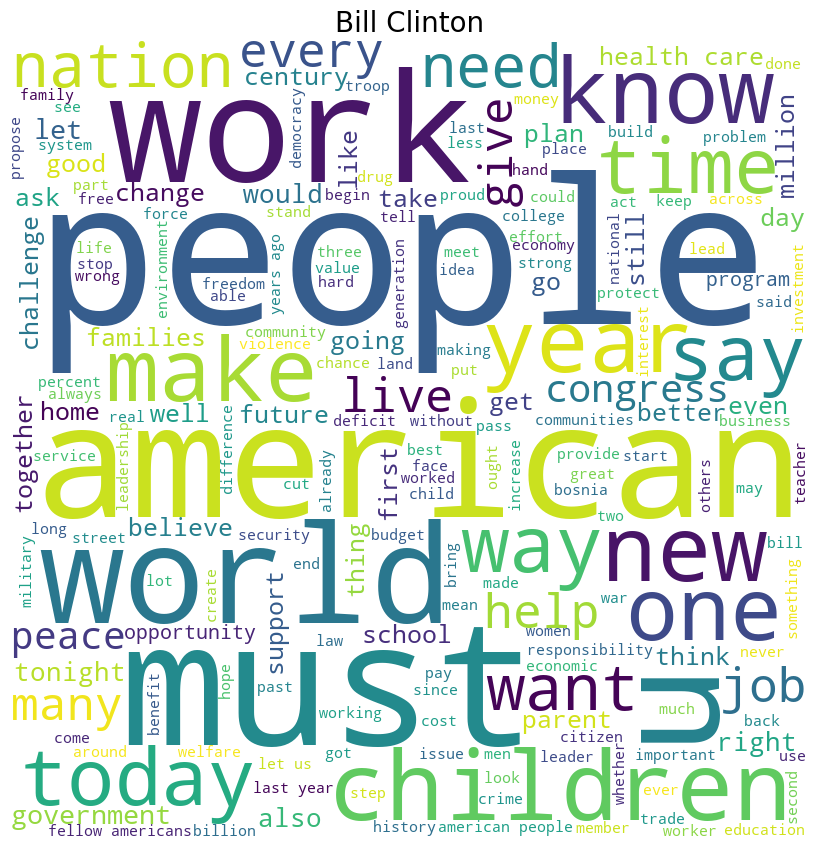

In [41]:
wordCloud("Bill Clinton")

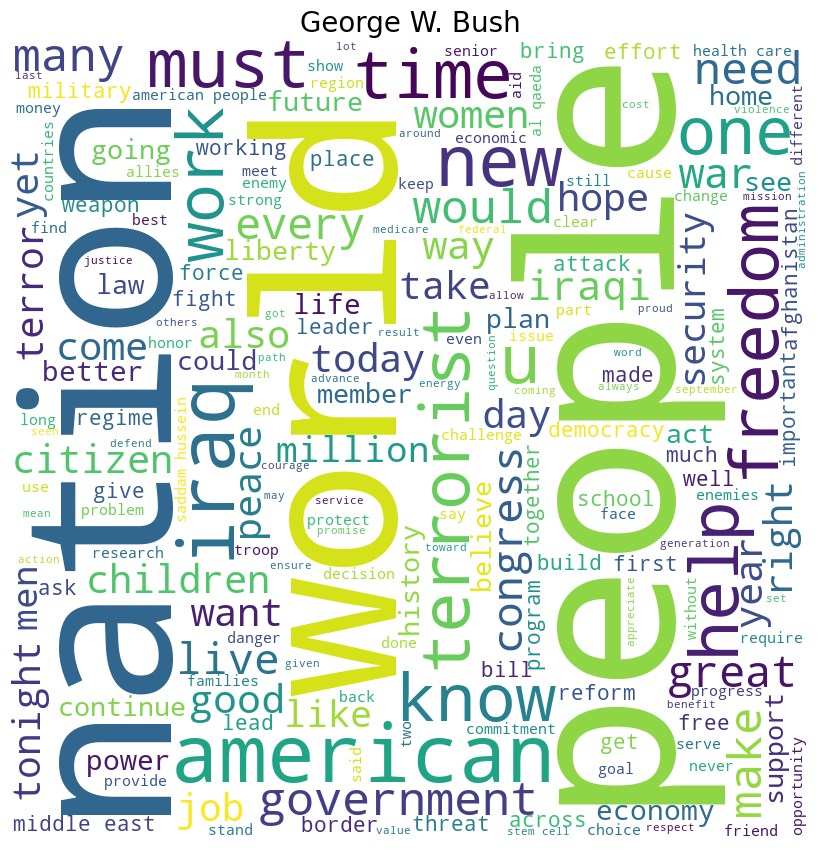

In [42]:
wordCloud("George W. Bush")

In [45]:
def pres_to_party(name):
    republican = ['Abraham Lincoln', 'Ulysses S. Grant', 'Rutherford B. Hayes', 'James A. Garfield', 'Chester A. Arthur', 
                  'Benjamin Harrison', 'William McKinley', 'Theodore Roosevelt', 
                  'William Taft', 'Warren G. Harding', 'Calvin Coolidge', 'Herbert Hoover', 'Dwight D. Eisenhower', 
                  'Richard M. Nixon', 'Gerald Ford', 'Ronald Reagan', 'George H. W. Bush', 
                  'George W. Bush', 'Donald Trump']
    if name in republican:
        return 'Republican'
    
    democratic = ['Andrew Jackson', 'Martin Van Buren', 'James K. Polk', 'Franklin Pierce', 'Andrew Johnson',
                  'James Buchanan', 'Grover Cleveland', 'Woodrow Wilson', 'Franklin D. Roosevelt', 
                  'Harry S. Truman', 'John F. Kennedy', 'Lyndon B. Johnson', 'Jimmy Carter', 'Bill Clinton', 'Barack Obama', "Joe Biden"]
    if name in democratic:
        return 'Democratic'
    
    whig = ['William Harrison', 'Zachary Taylor', 'Millard Fillmore', 'John Tyler']
    if name in whig:
        return 'Whig'
    
    unaffiliated = ['George Washington']
    if name in unaffiliated:
        return 'Unaffiliated'
    
    federalist = ['John Adams']
    if name in federalist:
        return 'Federalist'
    
    democratic_republican = ['Thomas Jefferson', 'James Madison', 'James Monroe', 'John Quincy Adams']
    if name in democratic_republican:
        return 'Democratic-Republican'
    
df['Party'] = df.President.apply(pres_to_party)

,President,Date,Transcript,Year,Split,Party
0,Joe Biden,2022-09-01 00:00:00,the president my fellow americans please if...,2022,"[the, president, my, fellow, americans, please...",Democratic
1,Joe Biden,2022-05-24 00:00:00,good evening fellow americans i had hoped w...,2022,"[good, evening, fellow, americans, i, had, hop...",Democratic
2,Joe Biden,2022-03-26 00:00:00,the president thank you thank you thank you...,2022,"[the, president, thank, you, thank, you, thank...",Democratic
3,Joe Biden,2022-03-01 00:00:00,speaker of the house nancy pelosi members of ...,2022,"[speaker, of, the, house, nancy, pelosi, membe...",Democratic
4,Joe Biden,2022-02-24 00:00:00,the president sorry to keep you waiting good...,2022,"[the, president, sorry, to, keep, you, waiting...",Democratic
...,...,...,...,...,...,...
1028,George Washington,1790-12-29,i the president of the united states by my ow...,1790,"[i, the, president, of, the, united, states, b...",Unaffiliated
1029,George Washington,1790-12-08,fellow citizens of the senate and house of rep...,1790,"[fellow, citizens, of, the, senate, and, house...",Unaffiliated
1030,George Washington,1790-01-08,fellow citizens of the senate and house of rep...,1790,"[fellow, citizens, of, the, senate, and, house...",Unaffiliated
1031,George Washington,1789-10-03,whereas it is the duty of all nations to ackno...,1789,"[whereas, it, is, the, duty, of, all, nations,...",Unaffiliated


In [47]:
def wordCloud_category(category):
    comment_words = '' 
    stopwords = set(final_stops) 
    
    pres_df = df[df.Party == category]
    section = pres_df.Transcript
    
    for val in section: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        comment_words += " ".join(tokens)+" "

    word_cloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(word_cloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)
    plt.title(category, fontsize = 20)
    plt.savefig('usa_dump/wordcloud_'+category+'.png');

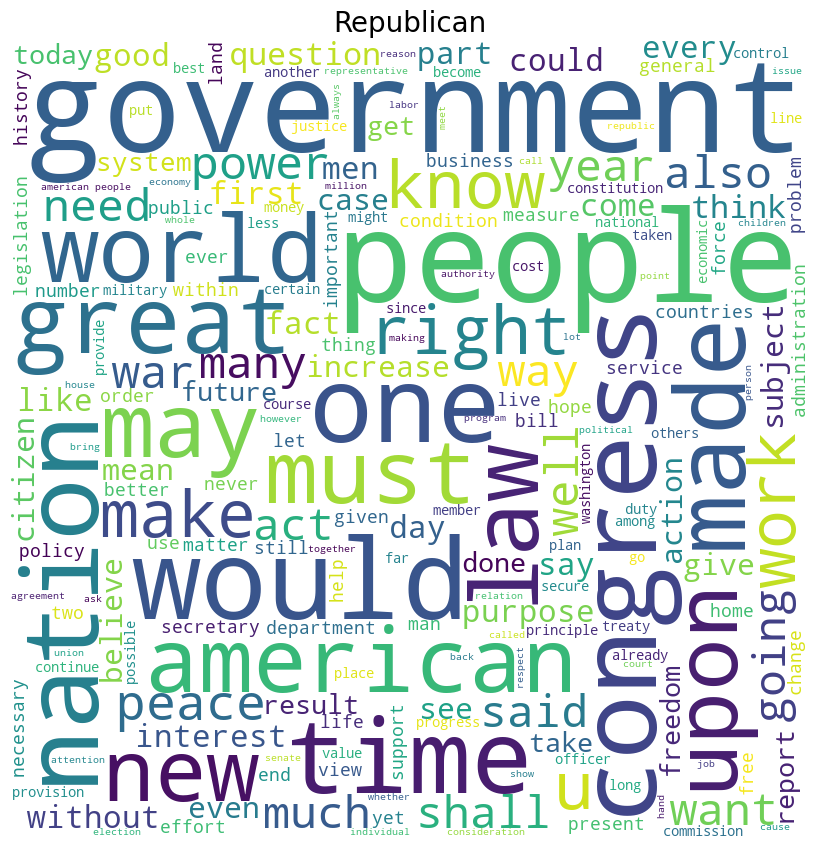

In [48]:
wordCloud_category("Republican")

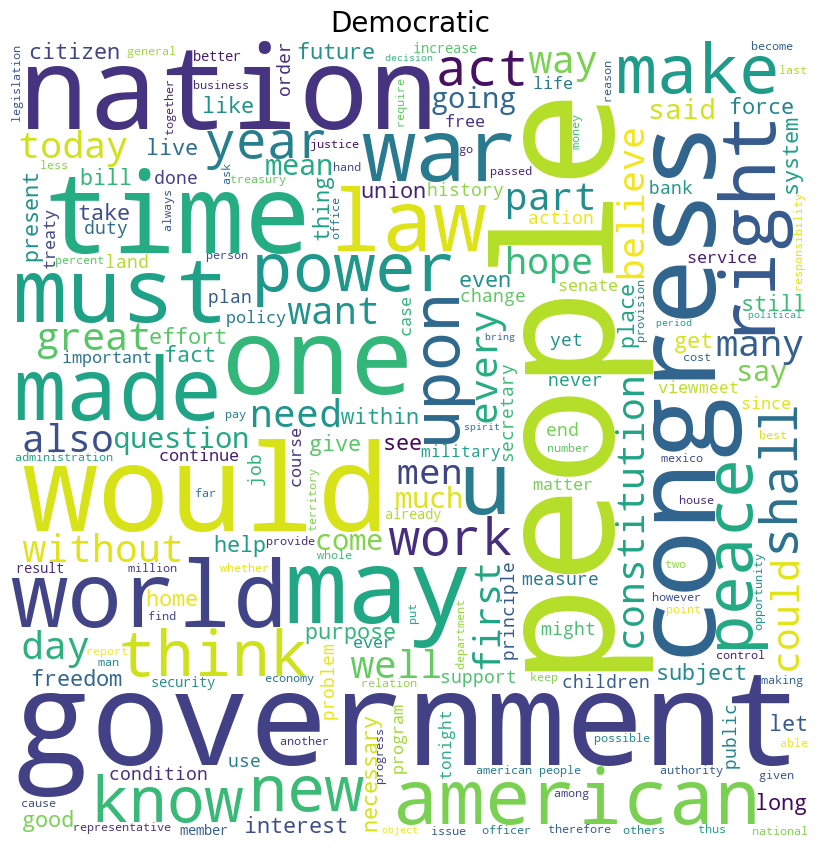

In [49]:
wordCloud_category("Democratic")

In [52]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment import sentiment_analyzer

In [54]:
allMywords = topic_word_nmf.columns
allw = [w for w in allMywords]

In [55]:
def negative(text):
    negatives = []
    for line in text:
        sp = ' '.join(line)
        score = SentimentIntensityAnalyzer().polarity_scores(sp)
        negatives.append(score['neg'])
    return negatives

In [56]:
def sentiment_positive(text):
    positives = []
    for line in text:
        sp = ' '.join(line)
        score = SentimentIntensityAnalyzer().polarity_scores(sp)
        positives.append(score['pos'])
    return positives

In [57]:
df['Sentiment'] = sentiment_positive(df.Split)
df_neg =df.copy()

In [58]:
df_neg['Negative'] = negative(df.Split)
df_neg.sample()

,President,Date,Transcript,Year,Split,Party,Sentiment,Negative
165,Bill Clinton,1996-06-25,good morning ladies and gentlemen and let me...,1996,"[good, morning, ladies, and, gentlemen, and, l...",Democratic,0.134,0.165


In [59]:
def sentiment_analysis_graph(president):
    filter1 = df.President.str.contains(president)
    func_df = df.loc[filter1]
    text = ''.join(str(func_df.Split[:]))
    score = SentimentIntensityAnalyzer().polarity_scores(text)
    return score['pos']

In [60]:
df

,President,Date,Transcript,Year,Split,Party,Sentiment
0,Joe Biden,2022-09-01 00:00:00,the president my fellow americans please if...,2022,"[the, president, my, fellow, americans, please...",Democratic,0.151
1,Joe Biden,2022-05-24 00:00:00,good evening fellow americans i had hoped w...,2022,"[good, evening, fellow, americans, i, had, hop...",Democratic,0.098
2,Joe Biden,2022-03-26 00:00:00,the president thank you thank you thank you...,2022,"[the, president, thank, you, thank, you, thank...",Democratic,0.179
3,Joe Biden,2022-03-01 00:00:00,speaker of the house nancy pelosi members of ...,2022,"[speaker, of, the, house, nancy, pelosi, membe...",Democratic,0.159
4,Joe Biden,2022-02-24 00:00:00,the president sorry to keep you waiting good...,2022,"[the, president, sorry, to, keep, you, waiting...",Democratic,0.124
...,...,...,...,...,...,...,...
1028,George Washington,1790-12-29,i the president of the united states by my ow...,1790,"[i, the, president, of, the, united, states, b...",Unaffiliated,0.196
1029,George Washington,1790-12-08,fellow citizens of the senate and house of rep...,1790,"[fellow, citizens, of, the, senate, and, house...",Unaffiliated,0.204
1030,George Washington,1790-01-08,fellow citizens of the senate and house of rep...,1790,"[fellow, citizens, of, the, senate, and, house...",Unaffiliated,0.248
1031,George Washington,1789-10-03,whereas it is the duty of all nations to ackno...,1789,"[whereas, it, is, the, duty, of, all, nations,...",Unaffiliated,0.296


In [61]:
df_sent = df.copy().sort_values(by = 'Year')
df_sent = df_sent.groupby(['President'], sort=False).mean().reset_index()
df_sent.to_csv('usa_dump/President_sentiment_pos.csv')
df_sent

,President,Year,Sentiment
0,George Washington,1792.857143,0.178429
1,John Adams,1798.333333,0.187111
2,Thomas Jefferson,1804.541667,0.148833
3,James Madison,1812.500000,0.168500
4,James Monroe,1820.200000,0.177800
5,John Quincy Adams,1827.222222,0.150333
6,Andrew Jackson,1832.307692,0.141346
7,Martin Van Buren,1838.400000,0.146300
8,John Tyler,1842.388889,0.135000
9,William Harrison,1841.000000,0.179000


In [62]:
df_sent = df_neg.copy().sort_values(by = 'Year')
df_sent = df_sent.groupby(['President'], sort=False).mean().reset_index()
df_sent.to_csv('usa_dump/President_sentiment_neg.csv')
df_sent

,President,Year,Sentiment,Negative
0,George Washington,1792.857143,0.178429,0.061333
1,John Adams,1798.333333,0.187111,0.069778
2,Thomas Jefferson,1804.541667,0.148833,0.057500
3,James Madison,1812.500000,0.168500,0.071864
4,James Monroe,1820.200000,0.177800,0.055300
5,John Quincy Adams,1827.222222,0.150333,0.046444
6,Andrew Jackson,1832.307692,0.141346,0.052885
7,Martin Van Buren,1838.400000,0.146300,0.076100
8,John Tyler,1842.388889,0.135000,0.062667
9,William Harrison,1841.000000,0.179000,0.074000


/Users/kshitijalwadhi/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


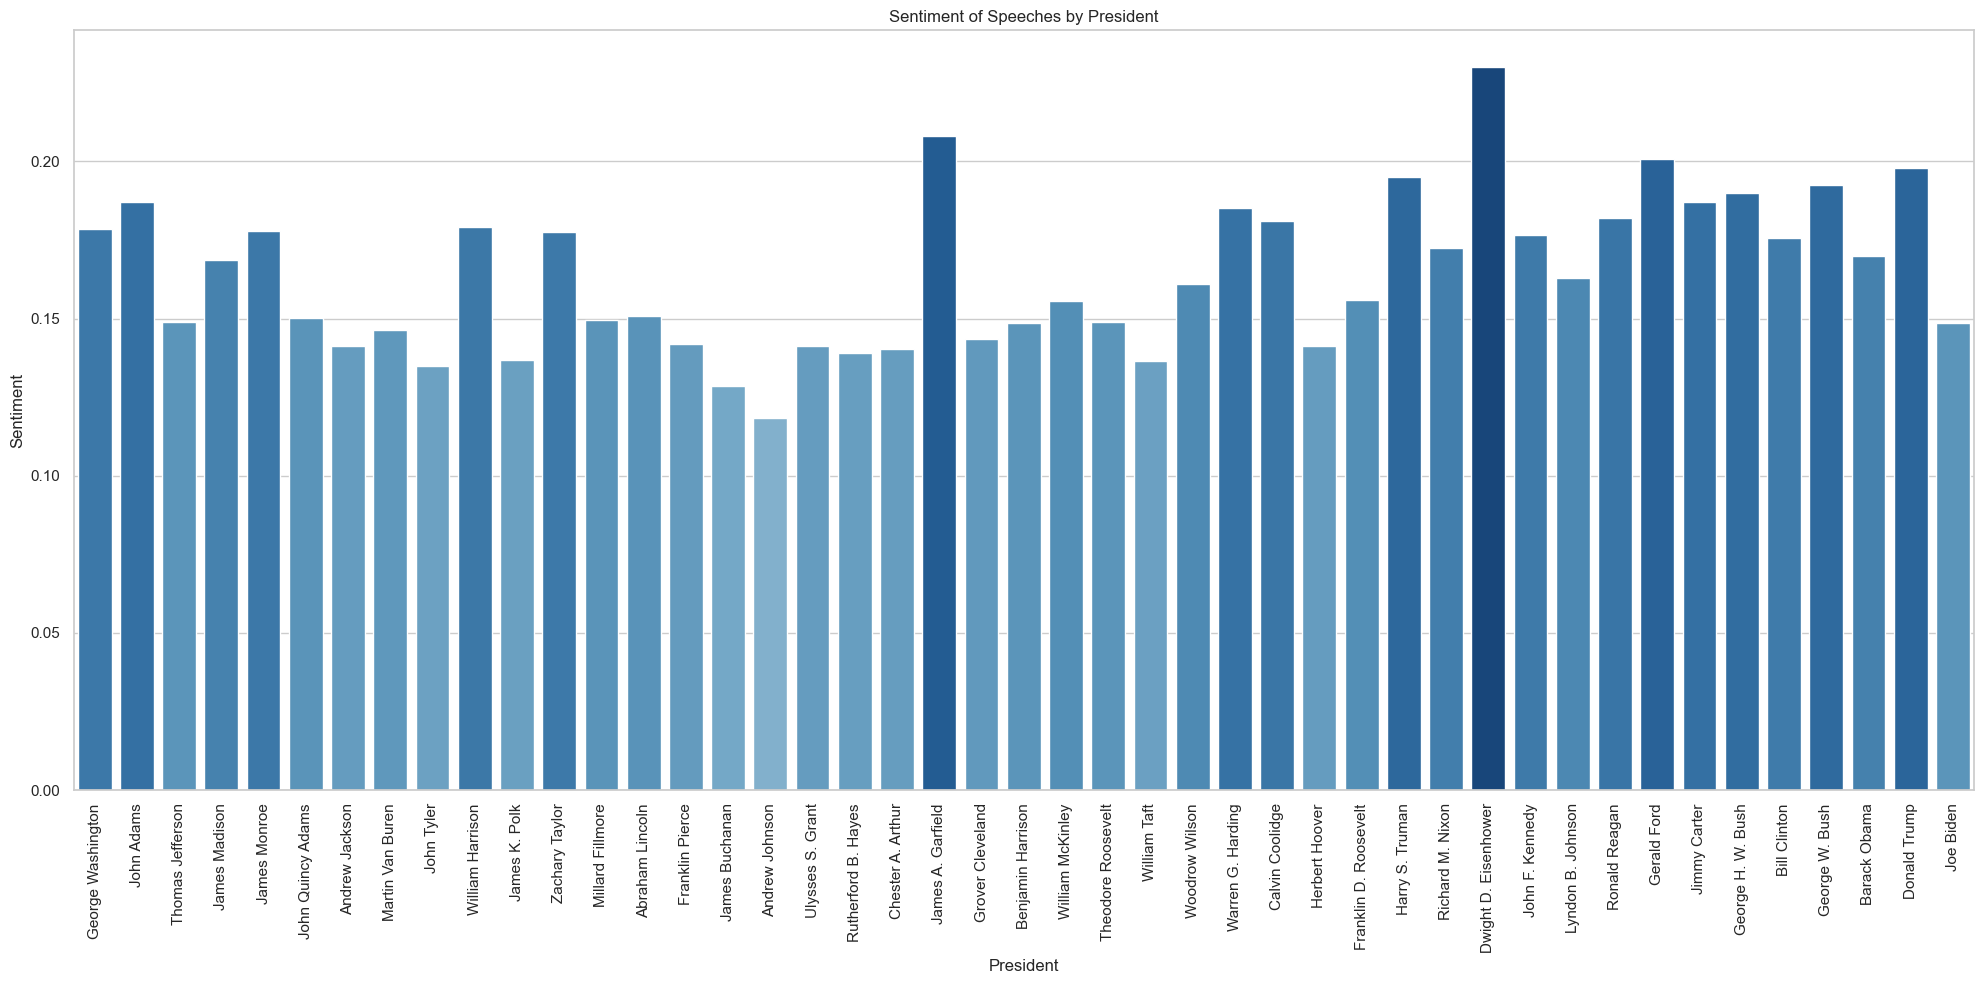

In [73]:
# bar plots of sentiment for each president using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

sns.set_theme(style="whitegrid")

plt.figure(figsize=(20,10))
sns.barplot(x="President", y="Sentiment", data=df_sent, palette = cm.Blues(df_sent.Sentiment*4))
plt.xticks(rotation=90)
plt.title('Sentiment of Speeches by President')
plt.savefig('usa_dump/sentiment_bar.png')

In [77]:
df_sent['Party'] = df_sent.President.apply(pres_to_party)

In [79]:
# group by party and take the mean of the sentiment
df_sent_grouped = df_sent.groupby(['Party'], sort=False).mean().reset_index()

In [80]:
df_sent_grouped

,Party,Year,Sentiment,Negative
0,Unaffiliated,1792.857143,0.178429,0.061333
1,Federalist,1798.333333,0.187111,0.069778
2,Democratic-Republican,1816.115972,0.161367,0.057777
3,Democratic,1920.333472,0.155572,0.078239
4,Whig,1845.865079,0.160232,0.055497
5,Republican,1929.146811,0.170687,0.076750


In [82]:
# keep only Democratic and Republican
df_sent_grouped = df_sent_grouped[df_sent_grouped.Party != 'Whig']
df_sent_grouped = df_sent_grouped[df_sent_grouped.Party != 'Unaffiliated']
df_sent_grouped = df_sent_grouped[df_sent_grouped.Party != 'Federalist']
df_sent_grouped = df_sent_grouped[df_sent_grouped.Party != 'Democratic-Republican']

/Users/kshitijalwadhi/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


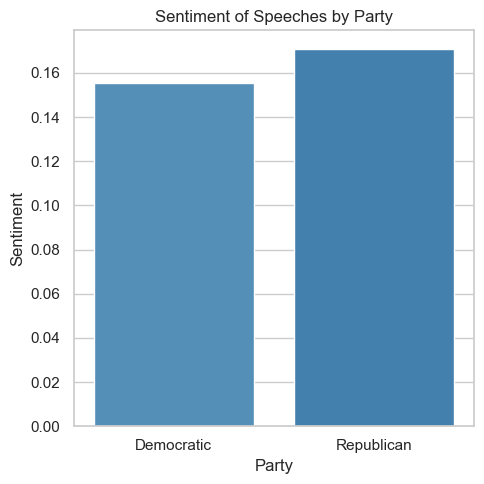

In [87]:
# bar plot of sentiment by party
plt.figure(figsize=(5,5))
sns.barplot(x="Party", y="Sentiment", data=df_sent_grouped, palette = cm.Blues(df_sent_grouped.Sentiment*4))
plt.title('Sentiment of Speeches by Party')
plt.savefig('usa_dump/sentiment_bar_party.png')